In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df=pd.read_csv('loan_sanction_train.csv')

In [132]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [133]:
df.drop('Loan_ID',axis=1,inplace=True)

In [134]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [136]:
df.shape

(614, 12)

In [137]:
df.isnull().mean()*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [138]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

In [139]:
df.isnull().mean()*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [140]:
df.dropna(subset = ['Credit_History'],inplace = True)

In [141]:
df.isnull().mean()*100

Gender               2.127660
Married              0.531915
Dependents           2.659574
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.723404
Loan_Amount_Term     2.482270
Credit_History       0.000000
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [142]:
df=df.dropna()

In [143]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [144]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [145]:
#no of males and females in dataset
mf=df['Gender'].value_counts()

Text(0.5, 1.0, 'gender distribution')

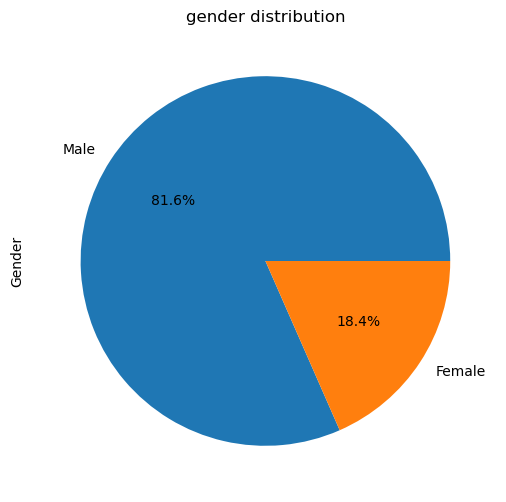

In [146]:
plt.figure(figsize=(20,6))
mf.plot(kind='pie',autopct='%1.1f%%')
plt.title('gender distribution')

In [147]:
#no married and unmarried people
mf=df['Married'].value_counts()

Text(0.5, 1.0, 'married customers')

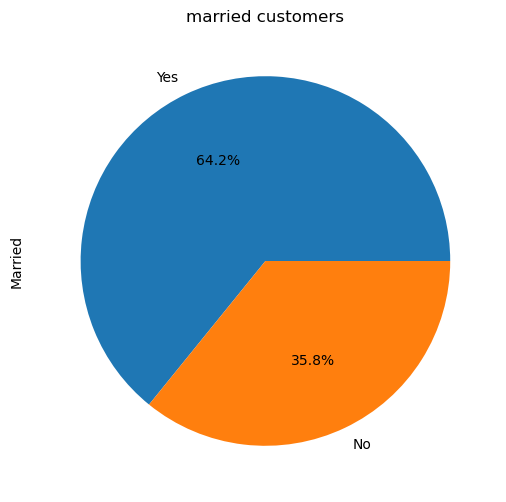

In [148]:
plt.figure(figsize=(20,6))
mf.plot(kind='pie',autopct='%1.1f%%')
plt.title('married customers')

In [149]:
mf=df[df['Gender']=='Male']['Married'].value_counts()

Text(0.5, 1.0, 'married male customers')

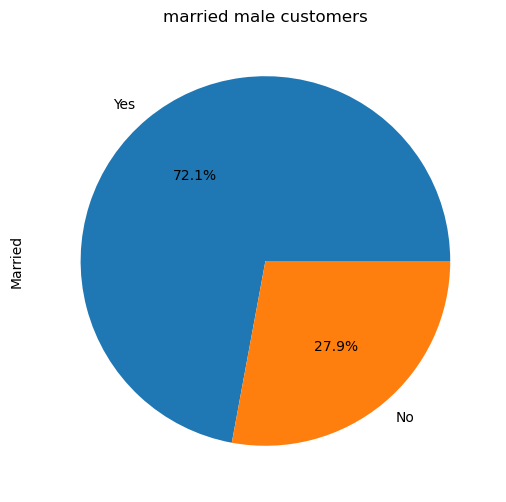

In [150]:
plt.figure(figsize=(20,6))
mf.plot(kind='pie',autopct='%1.1f%%')
plt.title('married male customers')

In [151]:
mf=df[df['Gender']=='Female']['Married'].value_counts()

Text(0.5, 1.0, 'married female customers')

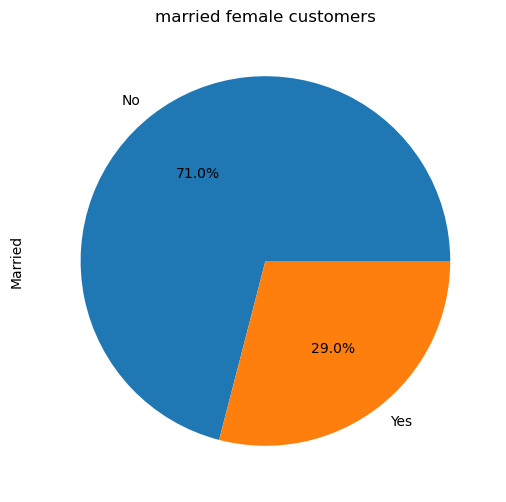

In [152]:
plt.figure(figsize=(20,6))
mf.plot(kind='pie',autopct='%1.1f%%')
plt.title('married female customers')

In [153]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [154]:
#customer division based on education 
mf=df['Education'].value_counts()

Text(0.5, 1.0, 'education status of customers')

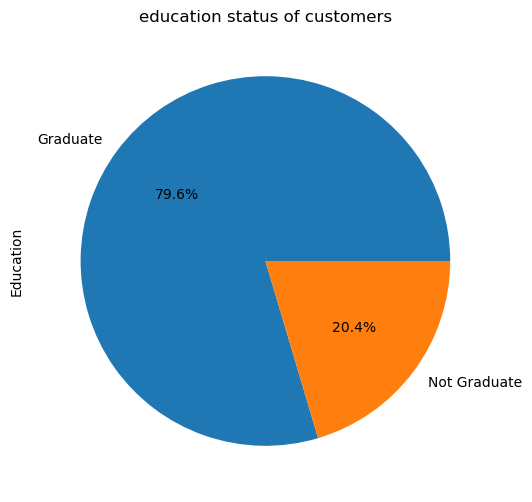

In [155]:
plt.figure(figsize=(20,6))
mf.plot(kind='pie',autopct='%1.1f%%')
plt.title('education status of customers')

In [156]:
mf=df['Property_Area'].value_counts()

Text(0.5, 1.0, 'property area of customers')

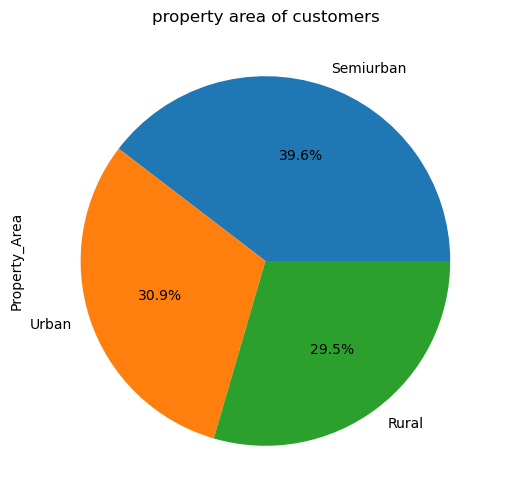

In [157]:
plt.figure(figsize=(20,6))
mf.plot(kind='pie',autopct='%1.1f%%')
plt.title('property area of customers')

In [172]:
mf=df['Loan_Amount_Term'].value_counts()

Text(0, 0.5, 'no of customers')

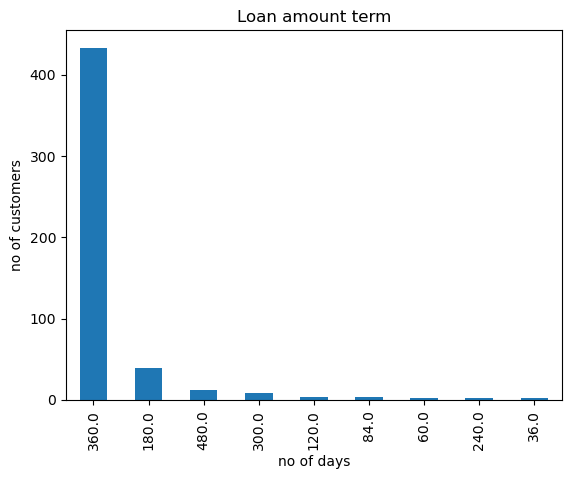

In [173]:
mf.plot(kind='bar')
plt.title('Loan amount term')
plt.xlabel('no of days')
plt.ylabel('no of customers')

In [174]:
mf=df['Loan_Status'].value_counts()

Text(0.5, 1.0, 'Loan Status')

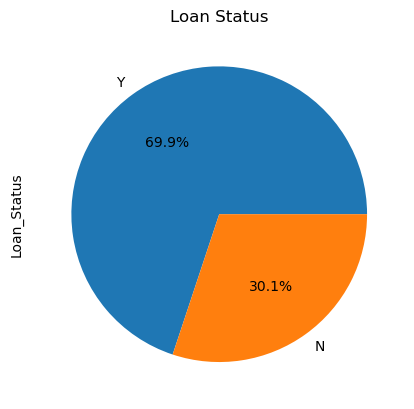

In [175]:
mf.plot(kind='pie',autopct='%1.1f%%')
plt.title('Loan Status')

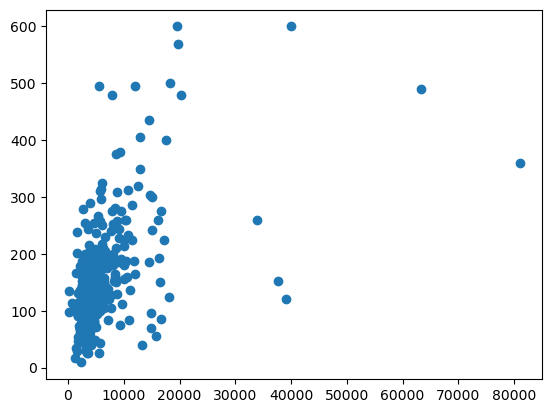

In [176]:
plt.scatter(df['ApplicantIncome'],df['LoanAmount'])

In [177]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [181]:
mf=df[df['Education']=='Graduate']

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [185]:
corr=df.corr()

<AxesSubplot:>

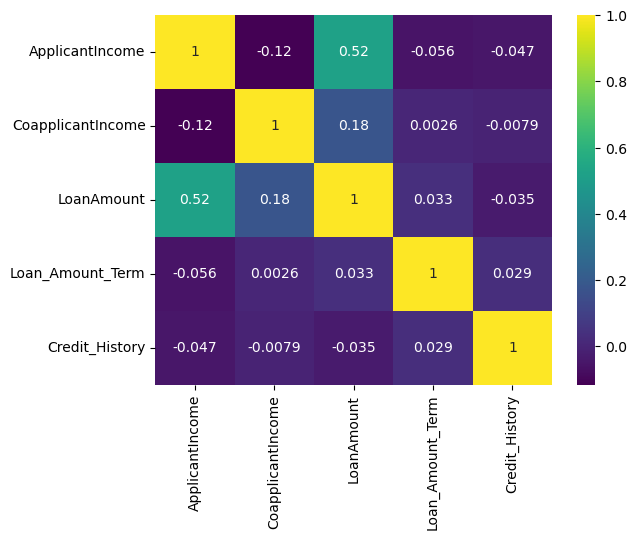

In [187]:
sns.heatmap(corr,annot=True,cmap='viridis')

Text(0.5, 0, 'Income')

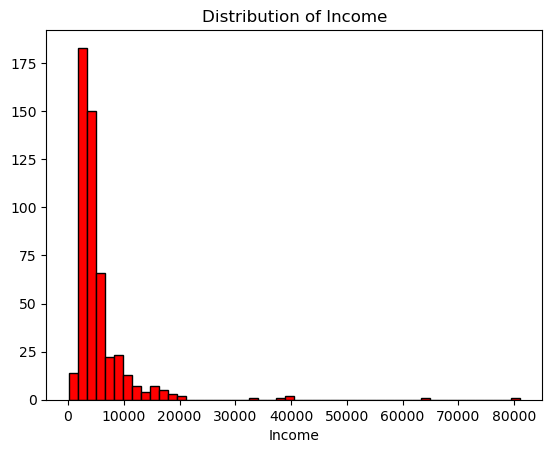

In [189]:
plt.hist(df['ApplicantIncome'], edgecolor = 'black', bins = 50, color = 'red')
plt.title('Distribution of Income')
plt.xlabel('Income')

In [215]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']
x=pd.get_dummies(x)

In [216]:
from sklearn.linear_model import LogisticRegression

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [229]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [230]:
model=LogisticRegression(max_iter=500)

In [231]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [232]:
pred=model.predict(x_test)

In [233]:
confusion_matrix(y_test,pred)

array([[10, 18],
       [ 1, 72]], dtype=int64)

In [235]:
from sklearn.metrics import classification_report

In [238]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           N       0.91      0.36      0.51        28\n           Y       0.80      0.99      0.88        73\n\n    accuracy                           0.81       101\n   macro avg       0.85      0.67      0.70       101\nweighted avg       0.83      0.81      0.78       101\n'

In [243]:
from sklearn.metrics import accuracy_score

In [244]:
accuracy_score(y_test,pred)

0.8118811881188119

In [245]:
from sklearn.tree import DecisionTreeClassifier

In [246]:
model=DecisionTreeClassifier()

In [247]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [249]:
pred=model.predict(x_test)

In [250]:
accuracy_score(y_test,pred)

0.6435643564356436

In [251]:
from sklearn.ensemble import RandomForestClassifier

In [252]:
model=RandomForestClassifier()

In [254]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [256]:
pred=model.predict(x_test)

In [257]:
accuracy_score(y_test,pred)

0.7821782178217822

In [259]:
from sklearn.svm import SVC

In [260]:
model=SVC()

In [262]:
model.fit(x_train,y_train)

SVC()

In [264]:
pred=model.predict(x_test)

In [265]:
accuracy_score(y_test,pred)

0.7227722772277227